In [1]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model


# **Data Preprocessing**

First, we will normalize signal before taking average for creation of dataset

---
Then, EWT transform will be calculated and fed into the neural net.

---

Q1) Acc. to paper normalization of the data was done before EWT transform, What should be the sequence here?

---

Q2) What should be taken as the loss function

---
Q3) How should we go about making training data?


In [ ]:
# Model Architecture

# 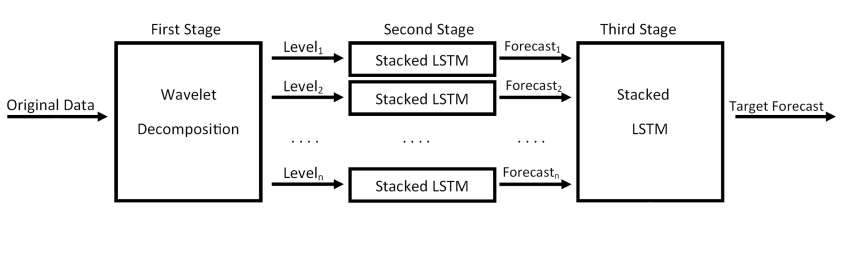

In [ ]:
# Now assuming we have 10 levels of data of some signal length (ewt_signal_length for now)
# let us define the stacked LSTM will be used for all the 10 levels of Input Data each of length ewt_signal_length

In [ ]:
# Stacked LSTM
# 2 layers of LSTM with memory units one of(32,16,8)
# 2nd layer of LSTM with half the memory units as of first
# 1 Dense layer


In [ ]:
no_samples = 1000
ewt_signal_length = 126
n_levels = 10

In [ ]:
def custom_layer1(tensor):
  return tensor[:,0,:]
def custom_layer2(tensor):
  return tensor[:,1,:]
def custom_layer3(tensor):
  return tensor[:,2,:]
def custom_layer4(tensor):
  return tensor[:,3,:]
def custom_layer5(tensor):
  return tensor[:,4,:]
def custom_layer6(tensor):
  return tensor[:,5,:]
def custom_layer7(tensor):
  return tensor[:,6,:]
def custom_layer8(tensor):
  return tensor[:,7,:]
def custom_layer9(tensor):
  return tensor[:,8,:]
def custom_layer10(tensor):
  return tensor[:,9,:]

In [ ]:
ewt_signal_length = ewt_signal_length
n_levels = 10
input = keras.Input(shape = (n_levels,ewt_signal_length))
input_data_model_1 = tensorflow.keras.layers.Lambda(custom_layer1, name="lambda_layer1")(input)
input_data_model_1 = layers.Reshape((1,ewt_signal_length))(input_data_model_1)
input_data_model_2 = tensorflow.keras.layers.Lambda(custom_layer2, name="lambda_layer2")(input)
input_data_model_2 = layers.Reshape((1,ewt_signal_length))(input_data_model_2)
input_data_model_3 = tensorflow.keras.layers.Lambda(custom_layer3, name="lambda_layer3")(input)
input_data_model_3 = layers.Reshape((1,ewt_signal_length))(input_data_model_3)
input_data_model_4 = tensorflow.keras.layers.Lambda(custom_layer4, name="lambda_layer4")(input)
input_data_model_4 = layers.Reshape((1,ewt_signal_length))(input_data_model_4)
input_data_model_5 = tensorflow.keras.layers.Lambda(custom_layer5, name="lambda_layer5")(input)
input_data_model_5 = layers.Reshape((1,ewt_signal_length))(input_data_model_5)
input_data_model_6 = tensorflow.keras.layers.Lambda(custom_layer6, name="lambda_layer6")(input)
input_data_model_6 = layers.Reshape((1,ewt_signal_length))(input_data_model_6)
input_data_model_7 = tensorflow.keras.layers.Lambda(custom_layer7, name="lambda_layer7")(input)
input_data_model_7 = layers.Reshape((1,ewt_signal_length))(input_data_model_7)
input_data_model_8 = tensorflow.keras.layers.Lambda(custom_layer8, name="lambda_layer8")(input)
input_data_model_8 = layers.Reshape((1,ewt_signal_length))(input_data_model_8)
input_data_model_9 = tensorflow.keras.layers.Lambda(custom_layer9, name="lambda_layer9")(input)
input_data_model_9 = layers.Reshape((1,ewt_signal_length))(input_data_model_9)
input_data_model_10 = tensorflow.keras.layers.Lambda(custom_layer10, name="lambda_layer10")(input)
input_data_model_10 = layers.Reshape((1,ewt_signal_length))(input_data_model_10)
for i in range(n_levels):
  globals()[f"input_data_model_{i+1}"] = layers.BatchNormalization(scale = False,center = False)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"]= layers.CuDNNLSTM(32,return_sequences = True)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"] = layers.CuDNNLSTM(16)(globals()[f"x{i+1}"])
  globals()[f"output_{i+1}"] = layers.Dense(1)(globals()[f"x{i+1}"])

outputs_models = layers.concatenate([output_1, output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9,output_10])
outputs_models = layers.BatchNormalization(scale = False,center = False)(outputs_models)
# final_output = layers.Dense(1)(outputs_models)
z = layers.Reshape((1,n_levels))(outputs_models)
z = layers.CuDNNLSTM(32,return_sequences = True)(z)
z = layers.CuDNNLSTM(16)(z)
final_output = layers.Dense(1)(z)
#z = layers.RNN(layers.LSTMCell(32),return_sequences = True)(outputs_models)
# z = layers.RNN(layers.LSTMCell(16))(z)
# final_output = layers.Dense(1)(z)
model = keras.Model(inputs = input,outputs = final_output,name = 'my_model')


In [ ]:
model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 10, 126)]    0           []                               
                                                                                                  
 lambda_layer1 (Lambda)         (None, 126)          0           ['input_3[0][0]']                
                                                                                                  
 lambda_layer2 (Lambda)         (None, 126)          0           ['input_3[0][0]']                
                                                                                                  
 lambda_layer3 (Lambda)         (None, 126)          0           ['input_3[0][0]']                
                                                                                           

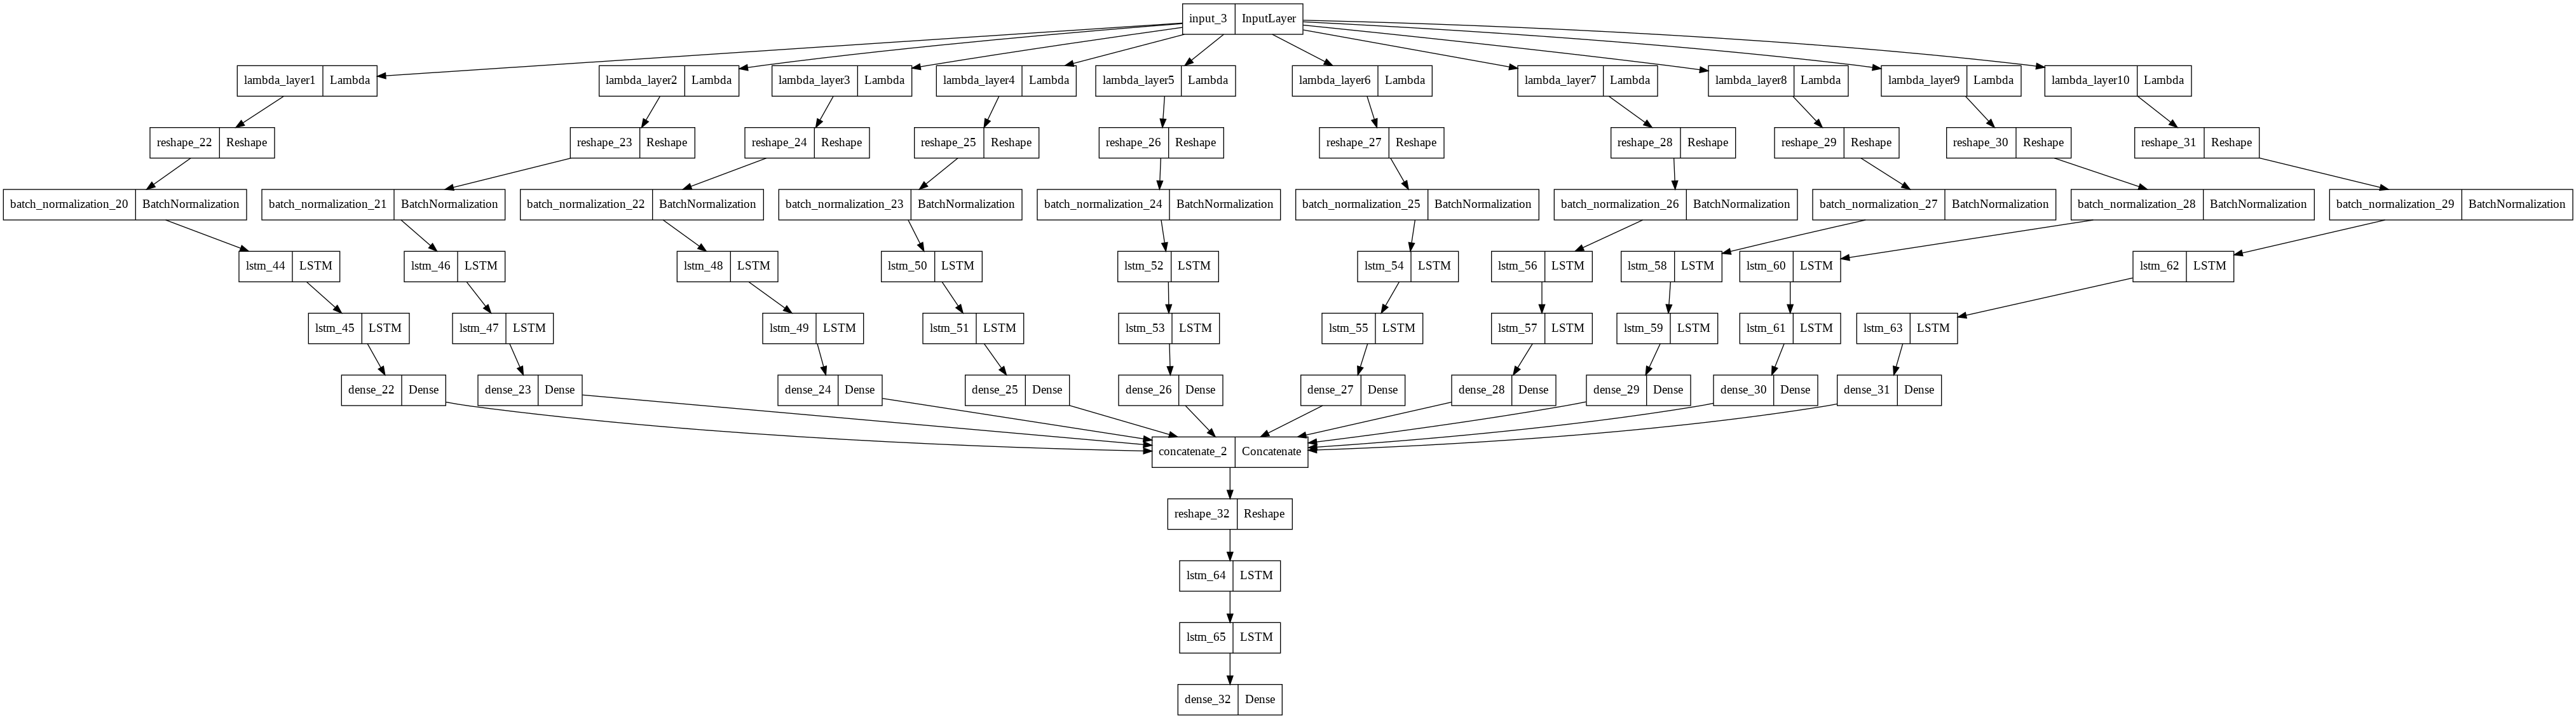

In [ ]:
plot_model(model)

In [ ]:
# Process to create training Data
# 1) Average raw files - 80 10 10 split
# 2) EWT computation - 10 levels of signal length
# Normalization - batch normalization

# 3) Training Dataset - 1 sample - 10*126  = 1  output  y
# 4) Q) Boundaries for ewt - same for all persons/recordings ? yes

In [ ]:
# take 1 file 
# 2000 cycles let say, 2000 files, resample , ewt, and proceed.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = np.load('/content/drive/MyDrive/ewt_output_sample.npy')

In [ ]:
x.shape

(126, 10, 131000)

In [ ]:
y = np.load('/content/drive/MyDrive/ewt_y.npy')

In [ ]:
y.shape

(131000,)

In [ ]:
X = x.transpose()

In [ ]:
X.shape

(131000, 10, 126)

In [ ]:
x_dataset,x_rem,y_dataset,y_rem = train_test_split(X,y,train_size = 0.15)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_dataset,y_dataset,train_size = 0.9)

In [ ]:
x_train.shape

(17685, 10, 126)

In [ ]:
x_test.shape

(1965, 10, 126)

In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['RootMeanSquaredError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!


In [ ]:
filepath = '/content/drive/MyDrive/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError

In [ ]:
history = model.fit(x_train,y_train, epochs=100, batch_size=10, verbose=1,validation_split = 0.15, callbacks = callbacks)

Epoch 1/100
1503/1504 [============================>.] - ETA: 0s - loss: 0.4849 - root_mean_squared_error: 0.6963 - mean_squared_error: 0.4849
Epoch 1: val_loss improved from 0.51850 to 0.48298, saving model to /content/drive/MyDrive/my_best_model.hdf5
1504/1504 [==============================] - 79s 34ms/step - loss: 0.4849 - root_mean_squared_error: 0.6964 - mean_squared_error: 0.4849 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950 - val_mean_squared_error: 0.4830
Epoch 2/100
1503/1504 [============================>.] - ETA: 0s - loss: 0.4614 - root_mean_squared_error: 0.6792 - mean_squared_error: 0.4614
Epoch 2: val_loss improved from 0.48298 to 0.48114, saving model to /content/drive/MyDrive/my_best_model.hdf5
1504/1504 [==============================] - 44s 30ms/step - loss: 0.4613 - root_mean_squared_error: 0.6792 - mean_squared_error: 0.4613 - val_loss: 0.4811 - val_root_mean_squared_error: 0.6936 - val_mean_squared_error: 0.4811
Epoch 3/100
1503/1504 [=================

In [3]:
x = np.load('/content/drive/MyDrive/x_n2.npy')

In [9]:
X = x.transpose()
X.shape

(101000, 10, 126)

In [5]:
y = np.load('/content/drive/MyDrive/y_n2.npy')

In [6]:
np.unique(y)

array([-0.767364, -0.47687 , -0.193201,  0.078374,  0.172603,  0.419829,
        0.500441,  0.720262,  0.920215,  1.080807,  1.295526,  1.501556,
             nan])

In [10]:
sum(~np.isnan(y))



93000

In [44]:
len(y)
x1 = np.zeros((93000,10,126))
y1 = np.zeros(93000)

In [45]:
y1.shape

(93000,)

In [46]:
j = 0

In [47]:
for i in range(len(y)):
  if (y[i] != np.nan):
    x1[j] = X[i]
    y1[j] = y[i]
    j = j+1

IndexError: ignored

In [35]:
x1.shape

(93000, 10, 126)

In [43]:
X.shape

(101000, 10, 126)

In [48]:
x1[0]

array([[-6.42882925e+03, -5.65679700e+03, -4.26056179e+03, ...,
         2.71486800e+03,  3.48336331e+03,  3.75203577e+03],
       [ 2.26859142e+03,  7.19713875e+02, -1.24780742e+03, ...,
        -3.14263266e+02,  2.65698818e+01,  2.34441417e+02],
       [ 1.54403133e+03, -1.44675328e+03, -1.37072960e+03, ...,
         4.71279567e+02,  1.00244208e+02, -4.91305155e+02],
       ...,
       [-1.14984607e+01,  3.36627723e+01, -5.33771672e+01, ...,
        -2.19804058e+02,  2.59961921e+02, -2.73842060e+02],
       [ 2.16880559e+01, -6.41647205e+01,  1.03981792e+02, ...,
        -2.82442255e+02,  2.97711606e+02, -3.02868382e+02],
       [ 4.99555303e+00, -1.49408298e+01,  2.47491707e+01, ...,
        -1.51666849e+02,  1.53623187e+02, -1.54278557e+02]])

In [51]:
X[0]

array([[-6.42882925e+03, -5.65679700e+03, -4.26056179e+03, ...,
         2.71486800e+03,  3.48336331e+03,  3.75203577e+03],
       [ 2.26859142e+03,  7.19713875e+02, -1.24780742e+03, ...,
        -3.14263266e+02,  2.65698818e+01,  2.34441417e+02],
       [ 1.54403133e+03, -1.44675328e+03, -1.37072960e+03, ...,
         4.71279567e+02,  1.00244208e+02, -4.91305155e+02],
       ...,
       [-1.14984607e+01,  3.36627723e+01, -5.33771672e+01, ...,
        -2.19804058e+02,  2.59961921e+02, -2.73842060e+02],
       [ 2.16880559e+01, -6.41647205e+01,  1.03981792e+02, ...,
        -2.82442255e+02,  2.97711606e+02, -3.02868382e+02],
       [ 4.99555303e+00, -1.49408298e+01,  2.47491707e+01, ...,
        -1.51666849e+02,  1.53623187e+02, -1.54278557e+02]])

In [52]:
np.isnan(y[1])

False

In [57]:
j = 0
for i in range(len(y)):
  if (np.isnan(y[i])== False):
    x1[j] = X[i]
    y1[j] = y[i]
    j = j+1

In [58]:
x1.shape

(93000, 10, 126)

In [59]:
y1.shape

(93000,)